In [42]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [26]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [27]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mfcc.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mfcc.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mfcc.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mfcc.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 40), (4499, 1), (4233, 41), (4233, 2))

In [29]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [30]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 40, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [31]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(40,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 40, 128)           66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [33]:
print("Train...")
model_mfcc=model.fit(X_train, y_train, batch_size=64, epochs=120, validation_data=(X_test, y_test))

Train...
Epoch 1/120
71/71 [==============================] - 11s 98ms/step - loss: 2.2561 - accuracy: 0.1496 - val_loss: 2.2593 - val_accuracy: 0.1602
Epoch 2/120
71/71 [==============================] - 6s 80ms/step - loss: 2.1410 - accuracy: 0.1934 - val_loss: 2.1474 - val_accuracy: 0.1984
Epoch 3/120
71/71 [==============================] - 6s 80ms/step - loss: 2.0290 - accuracy: 0.2449 - val_loss: 2.0661 - val_accuracy: 0.2592
Epoch 4/120
71/71 [==============================] - 6s 85ms/step - loss: 1.9459 - accuracy: 0.2918 - val_loss: 2.0097 - val_accuracy: 0.2783
Epoch 5/120
71/71 [==============================] - 5s 78ms/step - loss: 1.8656 - accuracy: 0.3098 - val_loss: 2.0207 - val_accuracy: 0.2861ETA
Epoch 6/120
71/71 [==============================] - 5s 71ms/step - loss: 1.7358 - accuracy: 0.3667 - val_loss: 1.9301 - val_accuracy: 0.3262
Epoch 7/120
71/71 [==============================] - 5s 68ms/step - loss: 1.6402 - accuracy: 0.4081 - val_loss: 1.9055 - val_accuracy: 

Epoch 115/120
71/71 [==============================] - 23s 327ms/step - loss: 0.3690 - accuracy: 0.8758 - val_loss: 3.2796 - val_accuracy: 0.4231
Epoch 116/120
71/71 [==============================] - 18s 254ms/step - loss: 0.4064 - accuracy: 0.8633 - val_loss: 2.8240 - val_accuracy: 0.4406
Epoch 117/120
71/71 [==============================] - 18s 256ms/step - loss: 0.4207 - accuracy: 0.8546 - val_loss: 3.1789 - val_accuracy: 0.4243
Epoch 118/120
71/71 [==============================] - 16s 230ms/step - loss: 0.3881 - accuracy: 0.8691 - val_loss: 3.2608 - val_accuracy: 0.4167
Epoch 119/120
71/71 [==============================] - 10s 138ms/step - loss: 0.3906 - accuracy: 0.8620 - val_loss: 3.2960 - val_accuracy: 0.4255
Epoch 120/120
71/71 [==============================] - 6s 89ms/step - loss: 0.3466 - accuracy: 0.8815 - val_loss: 3.3321 - val_accuracy: 0.4070


In [34]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 40, 128)           66560     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 3s 16ms/step - loss: 3.3321 - accuracy: 0.4070
Pre-training accuracy: 40.7040%


In [35]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8670815825462341
Testing Accuracy:  0.40703991055488586


In [36]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.40703991055488586


In [37]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[6 9 9 ... 9 1 9]


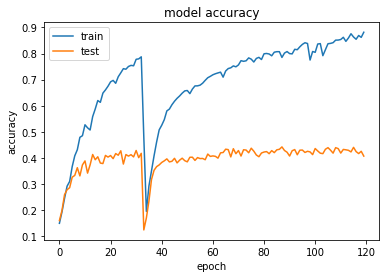

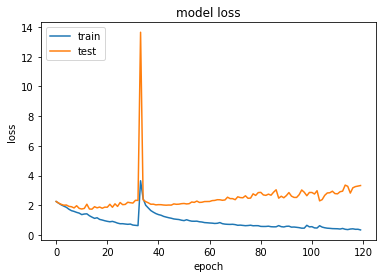

In [38]:
# summarize history for accuracy
plt.plot(model_mfcc.history['accuracy'])
plt.plot(model_mfcc.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mfcc.history['loss'])
plt.plot(model_mfcc.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
train_hist = pd.DataFrame(model_mfcc.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.256051,0.149589,2.259256,0.160170
1,2.141020,0.193376,2.147439,0.198441
2,2.028997,0.244943,2.066131,0.259154
3,1.945939,0.291843,2.009728,0.278290
4,1.865596,0.309847,2.020670,0.286086
...,...,...,...,...
115,0.406370,0.863303,2.824001,0.440586
116,0.420713,0.854634,3.178925,0.424285
117,0.388068,0.869082,3.260752,0.416726
118,0.390640,0.861969,3.295965,0.425467


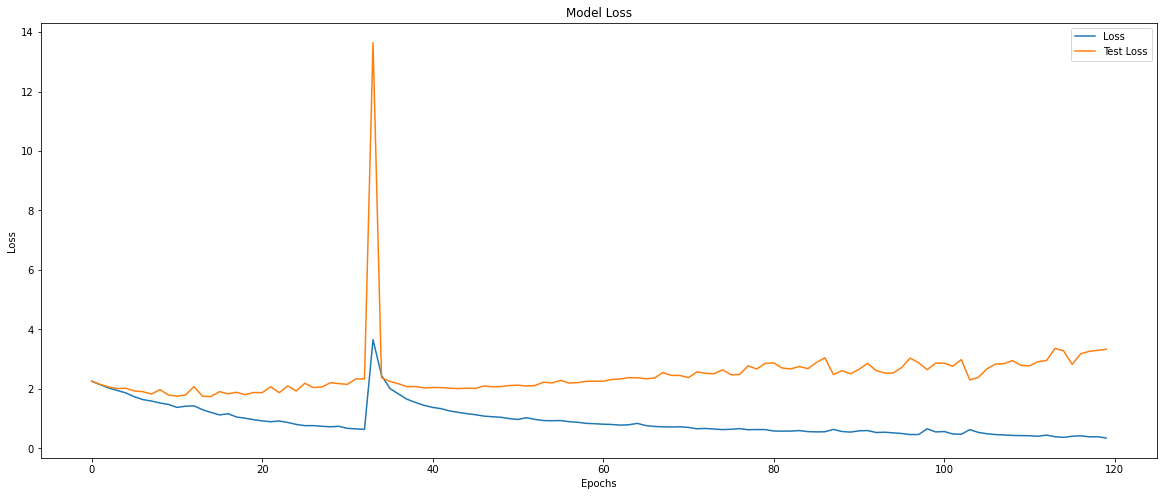

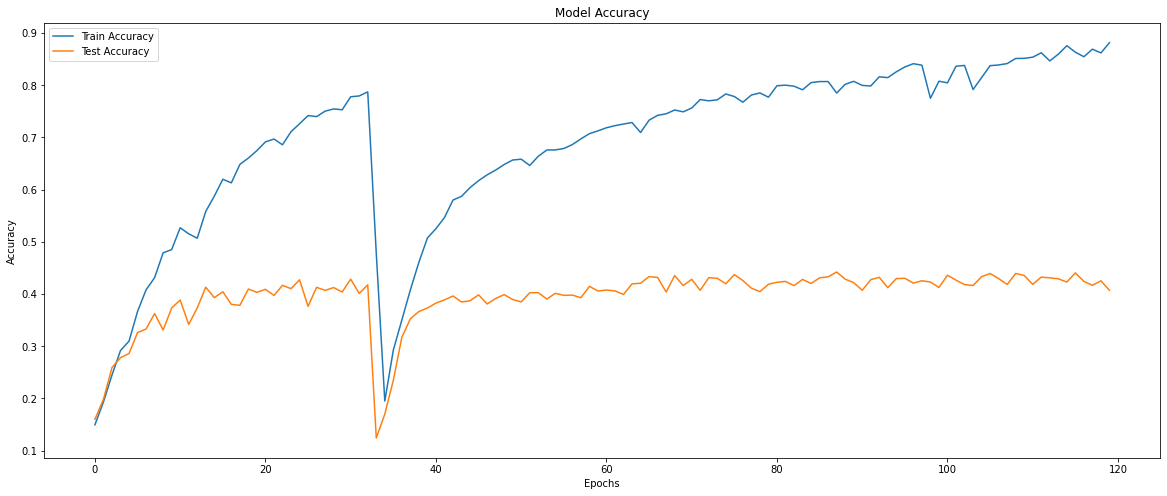

In [40]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [41]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[121   8  42  25  65  52  28  92  17  50]
 [  6 157   1   1  10   3   3  12   1  27]
 [ 28   6 168 129  38  24  29   5  22  51]
 [ 14   6  75 273  42   9  21  10  28  22]
 [ 10  47  25  37 224  12  12  72  17  44]
 [ 83  15  43  47  53 137   7  21  35  42]
 [  4   0  19  32   1   1 115   1   4   7]
 [  4  33   8   1 229   4   1 150   1  21]
 [ 14   2  27 115  19   9   8   5 166  28]
 [ 49  30  34  30  62  17  10  35  21 212]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.36      0.24      0.29       500
           1       0.52      0.71      0.60       221
           2       0.38      0.34      0.36       500
           3       0.40      0.55      0.46       500
           4       0.30      0.45      0.36       500
           5       0.51      0.28      0.36       483
           6       0.49      0.62      0.55       184
           7       0.37      0.33      0.35       452
           8       0.53      0.